In [1]:
!pip install spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [31]:
import pandas
mobile=pd.read_csv("C:/ExcelR/Data Science Assignments/11-Text Mining/Xiaomi Redmi 9 reviews.txt",error_bad_lines=False)

b'Skipping line 3: expected 1 fields, saw 10\n'


In [32]:
mobile

,x
0,Let’s make one thing clear immediately: the Xi...
1,The display of the Redmi 9 is pretty average. ...
2,"he battery backup, fortunately, is spectacular..."
3,There are three cameras on the Redmi 9: a 13MP...


In [8]:
mobile = [x.strip() for x in mobile.x] # remove both the leading and the trailing characters
mobile = [x for x in mobile if x] # removes empty strings, because they are considered in Python as False
mobile[0:10]

["Let’s make one thing clear immediately: the Xiaomi Redmi 9 is a phone with flaws, and it has a lot of them. On the other hand, it is one of the most affordable phones available anywhere right now, and it's hard to find a better phone at this price point.The screen is of barely acceptable quality, the camera is disappointing, and the performance is middling at best, and yet, the Redmi 9 counters these with its superb design, good feature set, long battery life, and finally, the biggest ace in its sleeve — the ultra-affordable pricing. Let that sink in — the Redmi 9 starts at less than 9000, This alone offsets all of the flaws that the phone has in store for us. Or does it? Let's look at the the many, many corners that have been cut to achieve this pricing",
 '"',
 'The display of the Redmi 9 is pretty average. Sure, it’s large and spacious with its 6.53-inch diagonal, and the resolution is more than sufficient, but it’s an LCD FHD+ display with bleak colors, low brightness, and disapp

In [9]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [10]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = mobile[4]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [11]:
one_block

"There are three cameras on the Redmi 9: a 13MP main, an 8MP ultra-wide, a 5MP macro camera, and a 2MP depth sensor. You can also shoot at 2X, but don't get fooled, it's merely a digital zoom solution. There’s an 8MP selfie camera up front, and video quality tops up at 1080p at 30fps."

In [12]:
for token in doc_block[0:20]:
    print(token, token.pos_)

There PRON
are AUX
three NUM
cameras NOUN
on ADP
the DET
Redmi PROPN
9 NUM
: PUNCT
a DET
13MP NUM
main NOUN
, PUNCT
an DET
8MP NUM
ultra ADJ
- ADJ
wide ADJ
, PUNCT
a DET


In [13]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['can', 'shoot', 'fooled', 'zoom', 'solution', '’s', 'selfie', 'camera', 'video', 'quality', 'tops', '30fps']


In [14]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,camera,2
1,cameras,1
2,main,1
3,depth,1
4,sensor,1
5,can,1
6,shoot,1
7,fooled,1
8,zoom,1
9,solution,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

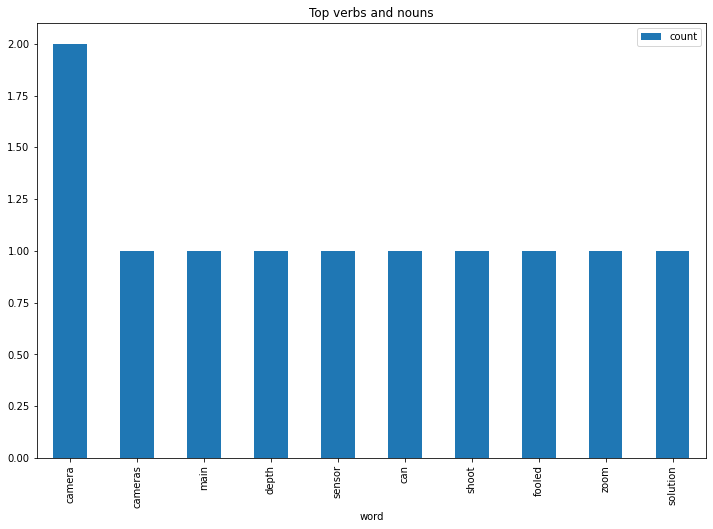

In [15]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [17]:
#Sentiment analysis
afinn = pd.read_csv("C:/ExcelR/Data Science Assignments/11-Text Mining/Afinn.csv", sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [18]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

mobile=pd.read_csv("C:/ExcelR/Data Science Assignments/11-Text Mining/Xiaomi Redmi 9 reviews.txt",error_bad_lines=False)
mobile = [x.strip() for x in mobile.x] # remove both the leading and the trailing characters
mobile = [x for x in book if x] # removes empty strings, because they are considered in Python as False

b'Skipping line 3: expected 1 fields, saw 10\n'


In [35]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(mobile))
sentences[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Sure, it’s large and spacious with its 6.53-inch diagonal, and the resolution is more than sufficient, but it’s an LCD FHD+ display with bleak colors, low brightness, and disappointing contrast.',
 'The display is lackluster, and I didn’t enjoy it at all during my time with the phone.',
 'You will also have a hard time under bright sunlight, as it’s just not bright enough.',
 'T he battery backup, fortunately, is spectacular on the Redmi 9.',
 "With the phone's fairly efficient hardware, the large, 5,020mAh battery takes a long while to drain.",
 'You can rest assured it will last you for a long time; in my experience, two days of usage were guaranteed.',
 "In our custom battery tests, the phone lasted for a combined time of 10 hours and 14 minutes, which is one of the best results we've seen so far in 2020.",
 'Charging, however, is pretty slow — the 10W charger included in the box topped up the Redmi 9 in 168 minutes, or 2 hours and 48 minutes.',
 "That's slow, but then again, what

In [36]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Let’s make one thing clear immediately: the Xi...
1,"On the other hand, it is one of the most affor..."
2,Let that sink in — the Redmi 9 starts at less ...
3,Or does it?
4,"Let's look at the the many, many corners that ..."
5,"Sure, it’s large and spacious with its 6.53-in..."
6,"The display is lackluster, and I didn’t enjoy ..."
7,You will also have a hard time under bright su...
8,"T he battery backup, fortunately, is spectacul..."
9,"With the phone's fairly efficient hardware, th..."


In [37]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [39]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [40]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [41]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [42]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    22
1    74
2    28
3     3
4    26
5    30
6    17
7    16
8    11
9    16
Name: word_count, dtype: int64

In [43]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
13,"That's slow, but then again, what else did you...",0,10
9,"With the phone's fairly efficient hardware, th...",0,16
10,You can rest assured it will last you for a lo...,1,21
0,Let’s make one thing clear immediately: the Xi...,1,22
7,You will also have a hard time under bright su...,1,16
6,"The display is lackluster, and I didn’t enjoy ...",2,17
16,"There’s an 8MP selfie camera up front, and vid...",2,16
11,"In our custom battery tests, the phone lasted ...",3,31
12,"Charging, however, is pretty slow — the 10W ch...",3,27
1,"On the other hand, it is one of the most affor...",6,74


In [44]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    17.000000
mean      0.823529
std       1.975958
min      -2.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       6.000000
Name: sentiment_value, dtype: float64

In [45]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
2,Let that sink in — the Redmi 9 starts at less ...,-2,28
3,Or does it?,0,3
4,"Let's look at the the many, many corners that ...",0,26
5,"Sure, it’s large and spacious with its 6.53-in...",-1,30
8,"T he battery backup, fortunately, is spectacul...",0,11


In [53]:
sent_df[sent_df['sentiment_value']>=2]

,sentence,sentiment_value,word_count,index
1,"On the other hand, it is one of the most affor...",6,74,1
6,"The display is lackluster, and I didn’t enjoy ...",2,17,6
11,"In our custom battery tests, the phone lasted ...",3,31,11
12,"Charging, however, is pretty slow — the 10W ch...",3,27,12
16,"There’s an 8MP selfie camera up front, and vid...",2,16,16


In [54]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value'>

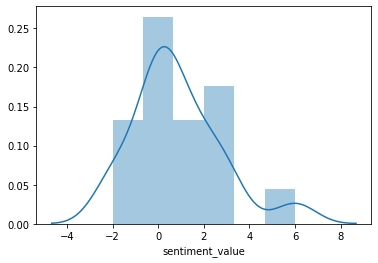

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

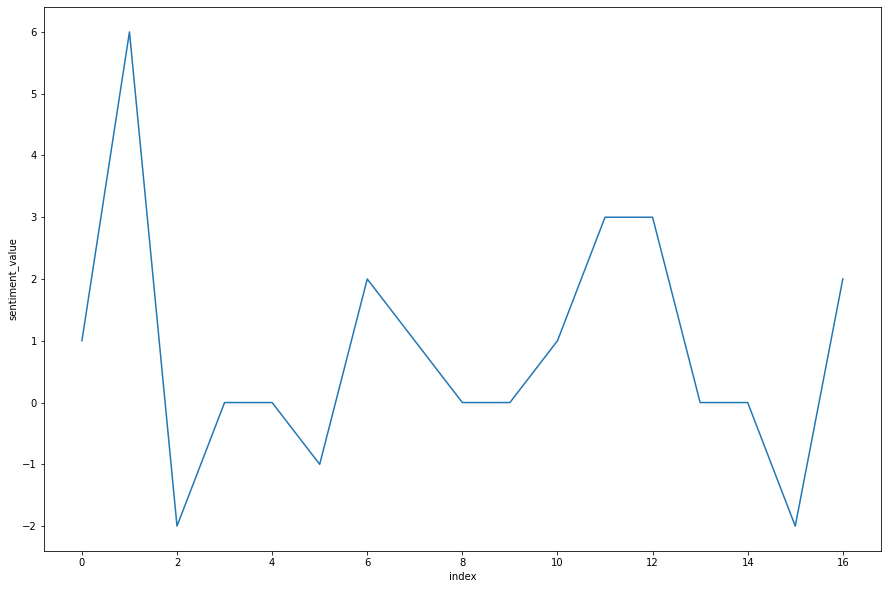

In [56]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

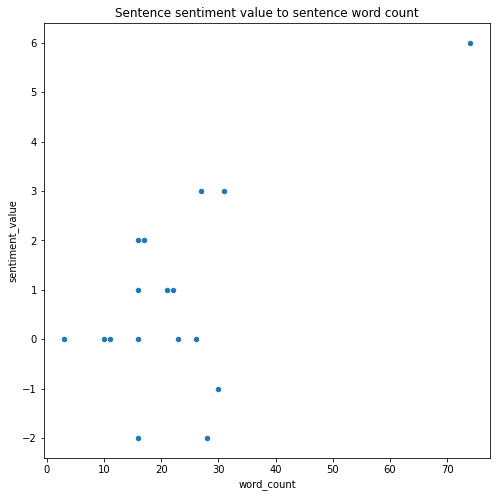

In [57]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')
